# Venn diagram summarising detections

We want to see what fraction of obejcts that are observed in all wavelength regimes are detected in each region

In [6]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
#plt.rc('figure', figsize=(10, 6))
from matplotlib_venn import venn3

import pyvo as vo

import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
service = vo.dal.TAPService(
          "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap")

In [3]:
query = """
SELECT 
COUNT(*) as n,
flag_optnir_det
FROM herschelhelp.main 
WHERE herschelhelp.main.flag_optnir_obs=7
GROUP BY herschelhelp.main.flag_optnir_det"""

job = service.submit_job(query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 2.
while job.phase == 'EXECUTING':
    print('Job still running after {} seconds.'.format(round(time.time() - start_time)))
    time.sleep(wait) 
    wait *=2

print(job.phase)
result = job_result.fetch_result()

Job still running after 0 seconds.
Job still running after 3 seconds.
Job still running after 7 seconds.
Job still running after 16 seconds.
Job still running after 32 seconds.
Job still running after 64 seconds.
Job still running after 129 seconds.
Job still running after 257 seconds.
Job still running after 513 seconds.
COMPLETED


In [4]:
result.table

n,flag_optnir_det
int32,int16
18252840,0
20012214,1
1648312,2
1822311,3
3590283,4
4894139,5
512915,6
5885563,7


All objects observed by all wavelength regimes


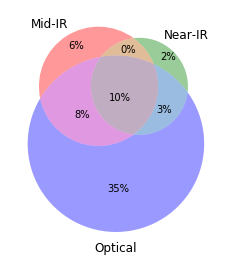

In [20]:
print("All objects observed by all wavelength regimes")
fig, ax = plt.subplots()
venn3(
    [
        result.table['n'][4],
        result.table['n'][2],
        result.table['n'][6],
        result.table['n'][1],
        result.table['n'][5],
        result.table['n'][3],
        result.table['n'][7]
    ],
    set_labels=('Mid-IR', 'Near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(result.table['n'])))
)
#plt.title("Detection of the {} sources detected\n in given wavelength domains "
#          "(among {} sources)".format(
#              locale.format('%d', np.sum(flag_det != 0), grouping=True),
#              locale.format('%d', len(flag_det), grouping=True)));
plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 2.0 * column_width_cm
hieght_cm = width_cm / 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/detection_pie_allHELP.pdf', bbox_inches='tight')
plt.savefig('./figs/detection_pie_allHELP.png', bbox_inches='tight')

## 2. All objects flag_optnir_det

In [9]:
query = """
SELECT 
COUNT(*) as n,
flag_optnir_det
FROM herschelhelp.main 
GROUP BY herschelhelp.main.flag_optnir_det"""

job = service.submit_job(query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 2.
while job.phase == 'EXECUTING':
    print('Job still running after {} seconds.'.format(round(time.time() - start_time)))
    time.sleep(wait) 
    wait *=2

print(job.phase)
result2 = job_result.fetch_result()

Job still running after 0 seconds.
Job still running after 3 seconds.
Job still running after 7 seconds.
Job still running after 16 seconds.
Job still running after 32 seconds.
Job still running after 64 seconds.
Job still running after 128 seconds.
Job still running after 257 seconds.
Job still running after 513 seconds.
COMPLETED


In [10]:
result2.table

n,flag_optnir_det
int32,int16
44572066,0
91467449,1
3921090,2
16178692,3
3845138,4
5218297,5
512946,6
5886452,7


All objects


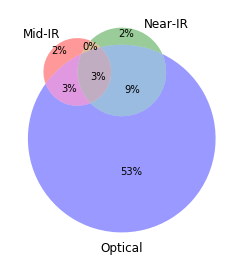

In [16]:
print("All objects")
fig, ax = plt.subplots()
venn3(
    [
        result2.table['n'][4],
        result2.table['n'][2],
        result2.table['n'][6],
        result2.table['n'][1],
        result2.table['n'][5],
        result2.table['n'][3],
        result2.table['n'][7]
    ],
    set_labels=('Mid-IR', 'Near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(result2.table['n'])))
)
#plt.title("Detection of the {} sources detected\n in given wavelength domains "
#          "(among {} sources)".format(
#              locale.format('%d', np.sum(flag_det != 0), grouping=True),
#              locale.format('%d', len(flag_det), grouping=True)));
plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 2.0 * column_width_cm
hieght_cm = width_cm / 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/detection_pie_allHELP_allobjects.pdf', bbox_inches='tight')
plt.savefig('./figs/detection_pie_allHELP_allobjects.png', bbox_inches='tight')

In [11]:
query = """
SELECT 
COUNT(*) as n,
flag_optnir_det
FROM herschelhelp.main 
WHERE herschelhelp.main.f_irac_i1 IS NOT NULL
GROUP BY herschelhelp.main.flag_optnir_det"""

job = service.submit_job(query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 2.
while job.phase == 'EXECUTING':
    print('Job still running after {} seconds.'.format(round(time.time() - start_time)))
    time.sleep(wait) 
    wait *=2

print(job.phase)
result3 = job_result.fetch_result()

Job still running after 0 seconds.
Job still running after 3 seconds.
Job still running after 7 seconds.
Job still running after 15 seconds.
Job still running after 32 seconds.
Job still running after 64 seconds.
Job still running after 128 seconds.
Job still running after 256 seconds.
COMPLETED


In [12]:
result3.table

n,flag_optnir_det
int32,int16
1611987,0
624068,1
123759,2
301611,3
3813902,4
5205306,5
511639,6
5877213,7


In [13]:
np.sum(result3.table['n'])

18069485

In [19]:

print("Total number of objects = {}".format(np.sum(result2.table['n'])))

print("Observed in all wavelength regimes = {}".format(np.sum(result.table['n']) ))
print("Total detected in two or more opt  = {}".format(
    result2.table['n'][1] + result2.table['n'][3] + result2.table['n'][5] + result2.table['n'][7]
))
print("Total detected in two or more nir = {}".format(
    result2.table['n'][2] +  result2.table['n'][3] + result2.table['n'][6] + result2.table['n'][7] 
))
print("Total detected in two or more opt and two or more nir = {}".format(
    result2.table['n'][3] + result2.table['n'][7]
))
print("Total detected in two or more opt and two or more nir and in IRAC 1 = {}".format(
    result3.table['n'][3] + result3.table['n'][7]
))
print("Total detected in two or more opt or two or more nir and in IRAC 1 = {}".format(
    result3.table['n'][5] + result3.table['n'][6] + result3.table['n'][7]
))

Total number of objects = 171602130
Observed in all wavelength regimes = 56618577
Total detected in two or more opt  = 118750890
Total detected in two or more nir = 26499180
Total detected in two or more opt and two or more nir = 22065144
Total detected in two or more opt and two or more nir and in IRAC 1 = 6178824
Total detected in two or more opt or two or more nir and in IRAC 1 = 11594158
